<a href="https://colab.research.google.com/github/SwatiBGupta1110/ML_Regression/blob/main/House_Price_Prediction_Using_Advanced_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. 
You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

Business Goal 

You are required to model the price of houses with the available independent variables.
This model will then be used by the management to understand how exactly the prices vary with the variables. 
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
house_price_data=pd.read_csv("/content/sample_data/House_Price_Train.csv")

In [133]:
house_price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [134]:
missing_columns=house_price_data.columns[house_price_data.isnull().any()].to_list()

In [135]:
house_price_data[missing_columns].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [136]:
house_price_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [137]:
print(house_price_data[missing_columns].isnull().sum())

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Missing Value Treatment :Numerical

In [138]:
house_price_data["LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

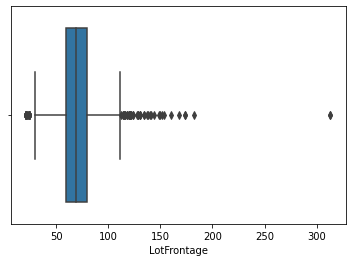

In [139]:
sns.boxplot(x=house_price_data["LotFrontage"])
#Data contains outliers. Hence taking mean would not be the correct imputation technique. Going with median.

In [140]:
print(house_price_data["LotFrontage"].describe())
house_price_data["LotFrontage"].fillna(69.0,inplace=True)

#Lets check if any missing value exists.
print(house_price_data["LotFrontage"].isnull().sum())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
0


In [141]:
house_price_data["MasVnrArea"]

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

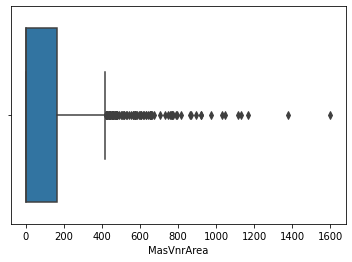

In [142]:
sns.boxplot(x=house_price_data["MasVnrArea"])
#Data contains outliers. Hence taking mean would not be the correct imputation technique. Going with median.

In [143]:
print(house_price_data["MasVnrArea"].describe())
house_price_data["MasVnrArea"].fillna(0.0,inplace=True)
print(house_price_data["MasVnrArea"].isnull().sum())

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
0


Missing Value Treatment :Categorical

In [144]:
house_price_data["GarageYrBlt"]

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

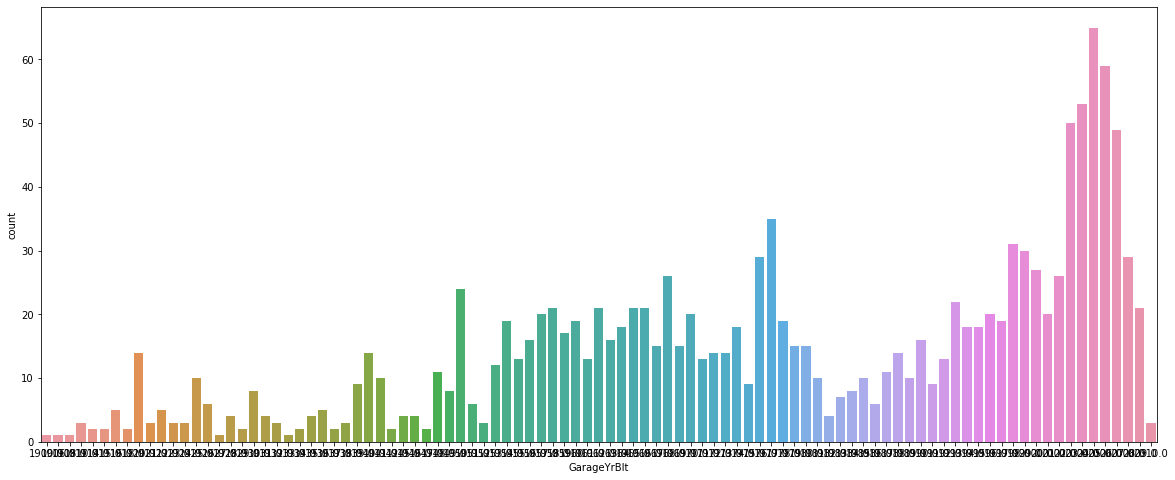

In [145]:
plt.figure(figsize=(20,8))
sns.countplot(x=house_price_data["GarageYrBlt"])
plt.show()
#Data contains outliers. Hence taking mean would not be the correct imputation technique. Going with median.

In [146]:
house_price_data["GarageYrBlt"].mode()

0    2005.0
dtype: float64

In [147]:
house_price_data["GarageYrBlt"].fillna(2005.0,inplace=True)
print(house_price_data["MasVnrArea"].isnull().sum())

0


In [148]:
house_price_data["Alley"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: Alley, Length: 1460, dtype: object

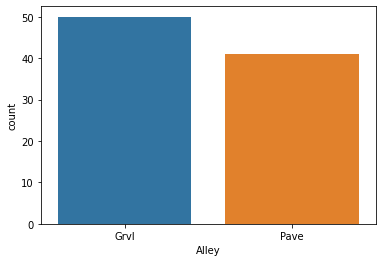

In [149]:
sns.countplot(x=house_price_data["Alley"])

In [150]:
house_price_data["Alley"].fillna("No_Alley",inplace=True)
print(house_price_data["Alley"].isnull().sum())

0


In [151]:
house_price_data["MasVnrType"]

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

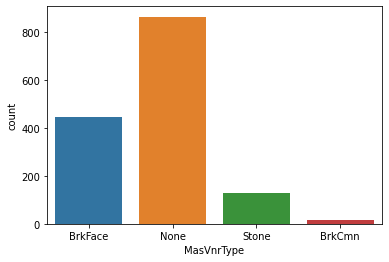

In [152]:
sns.countplot(x=house_price_data["MasVnrType"])

In [153]:
house_price_data["MasVnrType"].fillna("No_MasVnrType",inplace=True)
print(house_price_data["MasVnrType"].isnull().sum())

0


In [154]:
house_price_data["BsmtQual"]

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

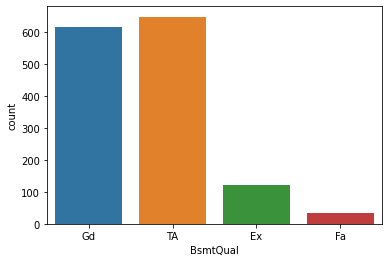

In [155]:
sns.countplot(x=house_price_data["BsmtQual"])

In [156]:
house_price_data["BsmtQual"].fillna("No_Basement",inplace=True)
print(house_price_data["BsmtQual"].isnull().sum())

0


In [157]:
house_price_data["BsmtCond"]

0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1460, dtype: object

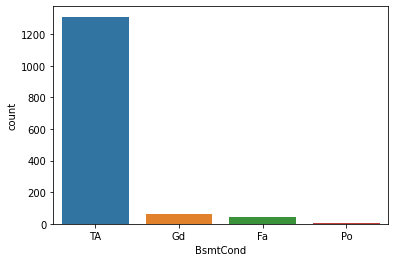

In [158]:
sns.countplot(x=house_price_data["BsmtCond"])

In [159]:
house_price_data["BsmtCond"].fillna("No_Basement",inplace=True)
print(house_price_data["BsmtCond"].isnull().sum())

0


In [160]:
house_price_data["BsmtExposure"]

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1460, dtype: object

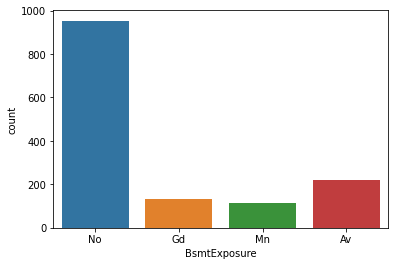

In [161]:
sns.countplot(x=house_price_data["BsmtExposure"])

In [162]:
house_price_data["BsmtExposure"].fillna("No_Basement",inplace=True)
print(house_price_data["BsmtExposure"].isnull().sum())

0


In [163]:
house_price_data["BsmtFinType1"]

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1460, dtype: object

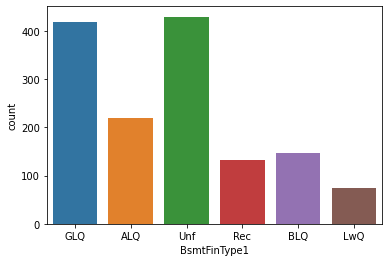

In [164]:
sns.countplot(x=house_price_data["BsmtFinType1"])

In [165]:
house_price_data["BsmtFinType1"].fillna("No_Basement",inplace=True)
print(house_price_data["BsmtFinType1"].isnull().sum())

0


In [166]:
house_price_data["BsmtFinType2"]

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1455    Unf
1456    Rec
1457    Unf
1458    Rec
1459    LwQ
Name: BsmtFinType2, Length: 1460, dtype: object

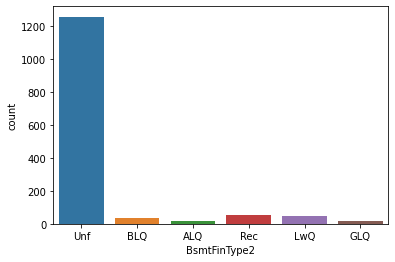

In [167]:
sns.countplot(x=house_price_data["BsmtFinType2"])

In [168]:
house_price_data["BsmtFinType2"].fillna("No_Basement",inplace=True)
print(house_price_data["BsmtFinType2"].isnull().sum())

0


In [169]:
house_price_data["Electrical"]

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

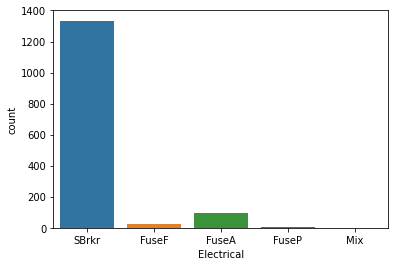

In [170]:
sns.countplot(x=house_price_data["Electrical"])

In [171]:
house_price_data["Electrical"].mode()

0    SBrkr
dtype: object

In [172]:
house_price_data["Electrical"].fillna("SBrkr",inplace=True)
print(house_price_data["Electrical"].isnull().sum())

0


In [173]:
house_price_data["FireplaceQu"]

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

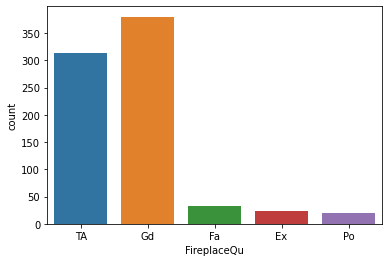

In [174]:
sns.countplot(x=house_price_data["FireplaceQu"])

In [175]:
house_price_data["FireplaceQu"].mode()

0    Gd
dtype: object

In [176]:
house_price_data["FireplaceQu"].fillna("Gd",inplace=True)
print(house_price_data["FireplaceQu"].isnull().sum())

0


In [177]:
house_price_data["GarageType"]

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

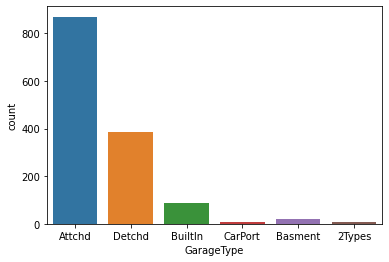

In [178]:
sns.countplot(x=house_price_data["GarageType"])

In [179]:
house_price_data["GarageType"].mode()

0    Attchd
dtype: object

In [180]:
house_price_data["GarageType"].fillna("Attchd",inplace=True)
print(house_price_data["GarageType"].isnull().sum())

0


In [181]:
house_price_data["GarageFinish"]

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object

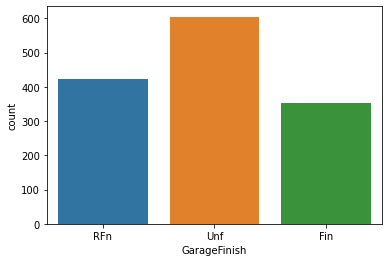

In [182]:
sns.countplot(x=house_price_data["GarageFinish"])

In [183]:
house_price_data["GarageFinish"].mode()

0    Unf
dtype: object

In [184]:
house_price_data["GarageFinish"].fillna("Unf",inplace=True)
print(house_price_data["GarageFinish"].isnull().sum())

0


In [185]:
house_price_data["GarageQual"]

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1460, dtype: object

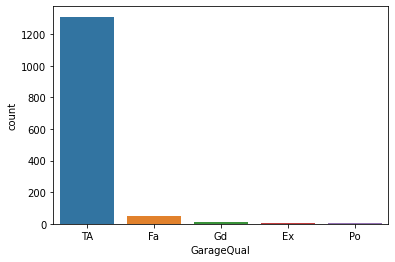

In [186]:
sns.countplot(x=house_price_data["GarageQual"])

In [187]:
house_price_data["GarageQual"].mode()

0    TA
dtype: object

In [188]:
house_price_data["GarageQual"].fillna("TA",inplace=True)
print(house_price_data["GarageQual"].isnull().sum())

0


In [189]:
house_price_data["GarageCond"]

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object

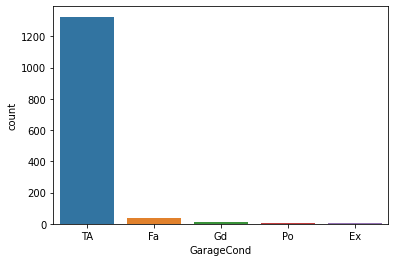

In [190]:
sns.countplot(x=house_price_data["GarageCond"])

In [191]:
house_price_data["GarageCond"].mode()

0    TA
dtype: object

In [192]:
house_price_data["GarageCond"].fillna("TA",inplace=True)
print(house_price_data["GarageCond"].isnull().sum())

0


In [193]:
house_price_data["PoolQC"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

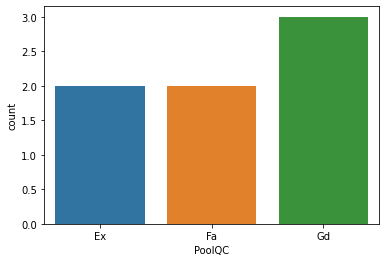

In [194]:
sns.countplot(x=house_price_data["PoolQC"])

In [195]:
house_price_data["PoolQC"].mode()

0    Gd
dtype: object

In [196]:
house_price_data["PoolQC"].fillna("Gd",inplace=True)
print(house_price_data["PoolQC"].isnull().sum())

0


In [197]:
house_price_data["Fence"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1455      NaN
1456    MnPrv
1457    GdPrv
1458      NaN
1459      NaN
Name: Fence, Length: 1460, dtype: object

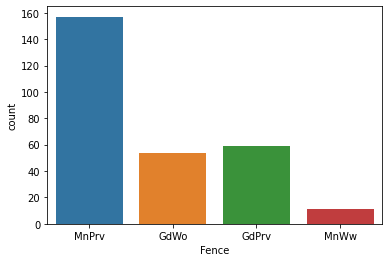

In [198]:
sns.countplot(x=house_price_data["Fence"])

In [199]:
house_price_data["Fence"].mode()

0    MnPrv
dtype: object

In [200]:
house_price_data["Fence"].fillna("MnPrv",inplace=True)
print(house_price_data["Fence"].isnull().sum())

0


In [201]:
house_price_data["MiscFeature"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1455     NaN
1456     NaN
1457    Shed
1458     NaN
1459     NaN
Name: MiscFeature, Length: 1460, dtype: object

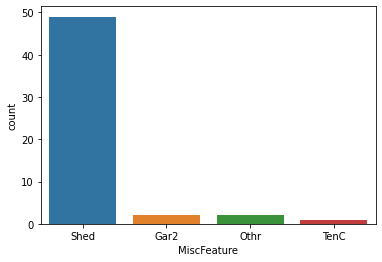

In [202]:
sns.countplot(x=house_price_data["MiscFeature"])

In [203]:
house_price_data["MiscFeature"].mode()

0    Shed
dtype: object

In [204]:
house_price_data["MiscFeature"].fillna("Shed",inplace=True)
print(house_price_data["MiscFeature"].isnull().sum())

0


In [205]:
from sklearn.preprocessing import StandardScaler


In [206]:
y=house_price_data["SalePrice"]

In [207]:
X=house_price_data.drop(columns=["SalePrice"])

In [208]:
X_categorical=house_price_data.select_dtypes(include="object") #We are partioning on the basis if data type to encode and scale categorical features not data Nature

In [209]:
X_numerical=house_price_data.select_dtypes(exclude="object")

In [210]:
dummy_X_categorical=pd.get_dummies(X_categorical,drop_first=True)  
dummy_X_categorical

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [211]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [212]:
min_max_scaler=MinMaxScaler()
std=StandardScaler()

In [213]:
numerical_headers=X_numerical.columns.values
# X_numerical[numerical_headers]=min_max_scaler.fit_transform(X_numerical)
X_numerical[numerical_headers]=std.fit_transform(X_numerical)
X_numerical

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.930592,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.160705,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.849755,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.728500,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.809337,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,0.250402,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.768918,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,1.723747,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,1.061367,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,-0.079868,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,1.726120,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,1.569647,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,1.527656,2.152216,-1.575348,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,1.728492,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,-0.832788,1.107810,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-1.211583,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


In [214]:
X=pd.concat([dummy_X_categorical,X_numerical],axis=1)

In [215]:
X

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,...,SaleCondition_Normal,SaleCondition_Partial,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.930592,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.160705,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.849755,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.728500,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.809337,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1.721374,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,0.250402,-0.819964

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [218]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [219]:
model_lm=LinearRegression()

In [220]:
model_lm.fit(X_train,y_train)

LinearRegression()

In [221]:
rfe= RFE(estimator=model_lm,n_features_to_select=100)

In [222]:
rfe=rfe.fit(X_train,y_train)

In [223]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSZoning_FV', False, 88),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', False, 13),
 ('MSZoning_RM', False, 25),
 ('Street_Pave', True, 1),
 ('Alley_No_Alley', True, 1),
 ('Alley_Pave', True, 1),
 ('LotShape_IR2', True, 1),
 ('LotShape_IR3', False, 23),
 ('LotShape_Reg', False, 3),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', False, 26),
 ('Utilities_NoSeWa', True, 1),
 ('LotConfig_CulDSac', False, 91),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR3', False, 30),
 ('LotConfig_Inside', False, 29),
 ('LandSlope_Mod', False, 61),
 ('LandSlope_Sev', True, 1),
 ('Neighborhood_Blueste', True, 1),
 ('Neighborhood_BrDale', True, 1),
 ('Neighborhood_BrkSide', False, 125),
 ('Neighborhood_ClearCr', False, 48),
 ('Neighborhood_CollgCr', False, 5),
 ('Neighborhood_Crawfor', False, 150),
 ('Neighborhood_Edwards', True, 1),
 ('Neighborhood_Gilbert', False, 85),
 ('Neighborhood_IDOTRR', False, 103),
 ('Neighborhood_MeadowV', False, 16),
 ('Neighborhood_Mitchel', 

In [224]:
top_100_features=X_train.columns[rfe.support_]

In [225]:
top_100_features

Index(['MSZoning_RH', 'Street_Pave', 'Alley_No_Alley', 'Alley_Pave',
       'LotShape_IR2', 'LandContour_HLS', 'LandContour_Low',
       'Utilities_NoSeWa', 'LotConfig_FR2', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_Edwards',
       'Condition1_RRAe', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosA', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_2fmCon', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_VinylSd',
       'Exterior2nd_CBlock', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Wd Sdng',
       'MasVnrType_Stone', 'ExterQual_Gd

In [226]:
X_train_top_100_features=X_train[top_100_features]

In [227]:
X_test_top_100_features=X_test[top_100_features]

#Ridge Regression_L2_Regularization

The cost function used in Ridge Regression is a modified function of any cost function. ie.MAE,MSE,RMSE,etc. with an added Penalty term that penalizes the ,model for predicting wrong values. Thus reducing overfitting.

Taking a cost function:

Summation[(y_actual-y_predicted)^2] --> This is the standard cost function.

Summation[(y_actual-y_predicted)^2] + Lambda * Summation[ (Slopes of all Features)^2 ]  --> (Penalty Term)-->This is the modified cost function for Ridge Regression.

Slopes are weight of features.

In sklearn the Lambda is renamed as Alpha where Alpha can take any postive value from 0 to Infinity.

(Alpha's value is considered only positive as we want the model to find the best fit line with least Loss accuracy. But if we apply Negative Aplha value we are reducing the error from its actual value instead of penalizing it. 

Alpha is hyperparameter which needs to be tuned which helps us to tune error and reduces model overfitting.

Summation[(y_actual-y_predicted)^2] =100 --> 100 is the total residual

y_predicted=B0+B1x1+B2x2
Lambda=0.1
B1=2
B2=4

100 + 0.1 * Summation[ (2^2) + (4^2)] = 100 +2 =102

Total errors are 102.



In [228]:
params={"alpha":[0.0001, 0.001, 0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}

In [229]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [230]:
ridge=Ridge()

In [231]:
folds=3 # As you Increase the folds, the computation time increase, More it will validate

model_cv=GridSearchCV(estimator=ridge,param_grid=params,scoring="neg_mean_absolute_error",cv=folds,return_train_score=True,verbose=1)

In [232]:
model_cv.fit(X_train_top_100_features,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [233]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results[["param_alpha","params","mean_test_score","mean_train_score"]]

,param_alpha,params,mean_test_score,mean_train_score
0,0.0001,{'alpha': 0.0001},-0.027247,-0.020784
1,0.001,{'alpha': 0.001},-0.271369,-0.207231
2,0.01,{'alpha': 0.01},-2.618846,-2.020466
3,0.05,{'alpha': 0.05},-11.919569,-9.468903
4,0.1,{'alpha': 0.1},-22.528063,-18.231515
5,0.2,{'alpha': 0.2},-42.668605,-35.198183
6,0.3,{'alpha': 0.3},-62.176210,-51.809297
7,0.4,{'alpha': 0.4},-81.324217,-68.188653
8,0.5,{'alpha': 0.5},-100.162925,-84.371330
9,0.6,{'alpha': 0.6},-118.728798,-100.403279


In [235]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.017690,0.000615,0.008964,0.000555,0.0001,{'alpha': 0.0001},-0.032380,-0.029689,-0.019673,-0.027247,0.005467,1,-0.022141,-0.021893,-0.018317,-0.020784,0.001747
1,0.016460,0.000636,0.010920,0.004013,0.001,{'alpha': 0.001},-0.321453,-0.296820,-0.195836,-0.271369,0.054349,2,-0.220241,-0.218898,-0.182555,-0.207231,0.017458
2,0.010869,0.004616,0.005653,0.002236,0.01,{'alpha': 0.01},-3.015094,-2.961276,-1.880170,-2.618846,0.522785,3,-2.103887,-2.185392,-1.772119,-2.020466,0.178732
3,0.007667,0.000049,0.004116,0.000092,0.05,{'alpha': 0.05},-12.693966,-14.662662,-8.402078,-11.919569,2.613873,4,-9.370391,-10.852786,-8.183532,-9.468903,1.091943
4,0.010648,0.003767,0.006672,0.001875,0.1,{'alpha': 0.1},-22.902567,-29.007611,-15.674012,-22.528063,5.449856,5,-17.549270,-21.542743,-15.602533,-18.231515,2.472599


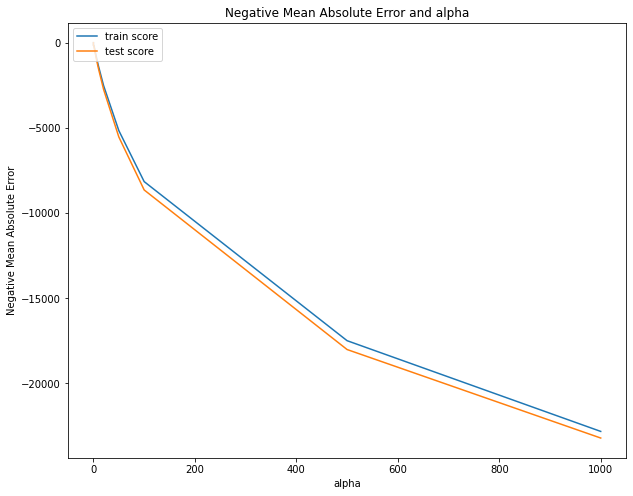

In [236]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
# plotting
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [239]:
alpha=0.0001
ridge=Ridge(alpha=alpha)
ridge.fit(X_train_top_100_features,y_train)
y_pred_ridge_train=ridge.predict(X_train_top_100_features)
y_pred_ridge_test=ridge.predict(X_test_top_100_features)

In [240]:
from sklearn.metrics import r2_score

print("**Train** ",r2_score(y_train,y_pred_ridge_train))
print("**Test** ",r2_score(y_test,y_pred_ridge_test))

**Train**  0.999999999999939
**Test**  0.9999999999998471


#Lasso Regression_L1_Regularization
The cost function used in Lasso Regression is a modified function of any cost function. ie.MAE,MSE,RMSE,etc. with an added Penalty term that penalizes the ,model for predicting wrong values. Thus reducing overfitting.

Taking a cost function:

Summation[(y_actual-y_predicted)^2] --> This is the standard cost function.

Summation[(y_actual-y_predicted)^2] + Lambda * Summation[ | (Slopes of all Features)| ] --> (Penalty Term) This is the modified cost function for Lasso Regression.

Note--> || is a modulo function

Slopes are weight of features.

In sklearn the Lambda is renamed as Alpha where Alpha can take any postive value from 0 to Infinity.

(Alpha's value is considered only positive as we want the model to find the best fit line with least Loss accuracy. But if we apply Negative Aplha value we are reducing the error from its actual value instead of penalizing it.

Alpha is hyperparameter which needs to be tuned which helps us to tune error and reduces model overfitting.

Summation[(y_actual-y_predicted)^2] =100 --> 100 is the total residual

y_predicted=B0+B1x1+B2x2 Lambda=0.1 B1=2 B2=4

100 + 0.1 * Summation[ |2| + | 4|] = 100 +0.6 =100.6

Total errors are 100.6.

In [241]:
params={"alpha":[0.0001, 0.001, 0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}

In [242]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [243]:
lasso=Lasso()

folds=3 # As you Increase the folds, the computation time increase, More it will validate

model_cv=GridSearchCV(estimator=lasso,param_grid=params,scoring="neg_mean_absolute_error",cv=folds,return_train_score=True,verbose=1)

In [244]:
model_cv.fit(X_train_top_100_features,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [247]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results[["param_alpha","params","mean_test_score","mean_train_score","rank_test_score"]]

,param_alpha,params,mean_test_score,mean_train_score,rank_test_score
0,0.0001,{'alpha': 0.0001},-13.503318,-7.358137,23
1,0.001,{'alpha': 0.001},-12.097547,-7.106369,22
2,0.01,{'alpha': 0.01},-9.649844,-6.203226,21
3,0.05,{'alpha': 0.05},-4.103143,-2.840637,14
4,0.1,{'alpha': 0.1},-0.626424,-0.681564,6
5,0.2,{'alpha': 0.2},-0.295802,-0.325859,2
6,0.3,{'alpha': 0.3},-0.224358,-0.224109,1
7,0.4,{'alpha': 0.4},-0.332307,-0.333312,3
8,0.5,{'alpha': 0.5},-0.428717,-0.431868,4
9,0.6,{'alpha': 0.6},-0.550589,-0.556788,5


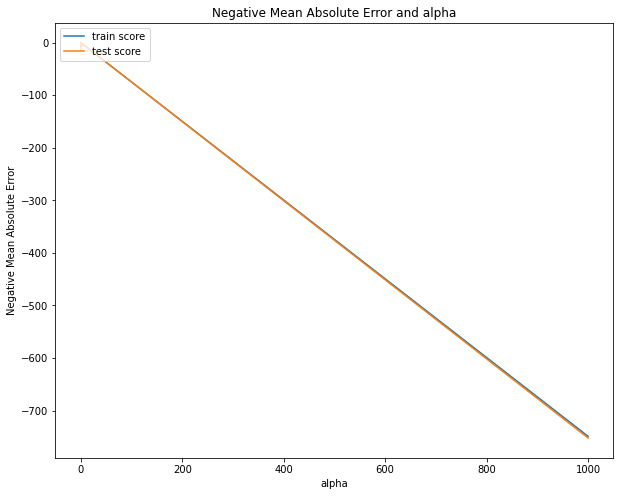

In [249]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
# plotting
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [250]:
alpha=0.3
lasso=Lasso(alpha=alpha)
lasso.fit(X_train_top_100_features,y_train)
y_pred_lasso_train=lasso.predict(X_train_top_100_features)
y_pred_lasso_test=lasso.predict(X_test_top_100_features)

In [251]:
from sklearn.metrics import r2_score

print("**Train** ",r2_score(y_train,y_pred_lasso_train))
print("**Test** ",r2_score(y_test,y_pred_lasso_test))

**Train**  0.9999999999778311
**Test**  0.9999999999784079
